# Quantum Cellular Automata: Examples

## Logan Hillberry

In [281]:
import sys
sys.path.append("../")  # look one directory up for qca modules, TODO: make a package

from qca import QCA
from states import make_state
import measures as ms
from networkviz import draw_MI

from copy import copy
from os import makedirs

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
from scipy.optimize import curve_fit

%matplotlib inline

In [282]:
# reload if changing source code
def reimport():
    import qca
    import networkviz
    from importlib import reload
    reload(qca)
    reload(networkviz)
    reload(ms)
    from qca import QCA
reimport()

In [283]:
PTstate = make_state(16, "P123")
rhoj = ms.get_rhoj(PTstate)
PT_MI =  ms.get_MI_from_state(PTstate, order=2)
PT_pagecurve = ms.get_entropy(ms.get_bipart(PTstate), order=2)
PT_C = ms.network_clustering(PT_MI)
PT_Y = ms.network_disparity(PT_MI)

In [284]:
# Parameters template
#IC = "f1-4-11-14"
IC = "f0-6-9-15"
params = dict(
              L=16,
              Lx=4,
              T=100.0,
              dt=1.0,
              R=12,
              r=1,
              V="H",
              BC="1-0000",
              IC=IC,
              E=0.0,
              N=1,
              totalistic=True,
              hamiltonian=False,
              trotter=True,
              symmetric=False)

der = "/home/lhillber/documents/research/cellular_automata/qeca/qca/data"

In [285]:
# Generate data and store as list of QCA objects
Rs = [4, 12, 20,28]
Qs = []
for R in Rs:
    p = copy(params)
    p["R"] = R
    Q = QCA(p, der=der)
    Q.run(tasks=["rhoj", "rhojk", "bipart"], verbose=True)
    Qs.append(Q)


Rank: 0
Nothing to add to f263ec97021aabebb23cb2fdd04ab0ad1b03bc61
Parameters: {'L': 16, 'Lx': 4, 'T': 100.0, 'dt': 1.0, 'R': 4, 'r': 1, 'V': 'H', 'IC': 'f0-6-9-15', 'BC': '1-0000', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'symmetric': False, 'totalistic': True, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 4, 'rank': 0, 'nprocs': 1}
total file size: 179.72 MB
took: 0.00 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/f263ec97021aabebb23cb2fdd04ab0ad1b03bc61.hdf5


Rank: 0
Nothing to add to cf4d09eae47f4e520b19ccf65b0c7f96463c59e5
Parameters: {'L': 16, 'Lx': 4, 'T': 100.0, 'dt': 1.0, 'R': 12, 'r': 1, 'V': 'H', 'IC': 'f0-6-9-15', 'BC': '1-0000', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'symmetric': False, 'totalistic': True, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 4, 'rank': 0, 'nprocs': 1}
total file size: 179.72 MB
took: 0.00 s
data at:
/home/lhillber/documents

In [286]:
# magnetization movies

vmin = -1
vmax = 1
cmap = "inferno"
tmin = 0
tmax = 60

# initialize figures
fig, axs = plt.subplots(1, len(Qs))
data_list = []
for i, Q in enumerate(Qs):
    data_list.append(Q.to2d(Q.exp("Z")))
    axs[i].imshow(data_list[i][0], vmin=vmin, vmax=vmax, cmap=cmap)
    axs[i].set_title(f"R={Q.R}")
plt.tight_layout()

# figure update function
def update(t):
    fig.suptitle(f"t={i}")
    for ax, data in zip(axs, data_list):
        ax.imshow(data[t], vmin=vmin, vmax=vmax, cmap=cmap)

# generate animation
anim_mag  = animation.FuncAnimation(fig, update, frames=tmax, fargs=())
plt.close()

In [287]:
# view animation as embedded HTML
HTML(anim_mag.to_html5_video())

In [288]:
# Network movies

order = 2
layout = "grid"
tmin  = 1
tmax = 60

# initialize figures
fig, axs = plt.subplots(2, len(Qs))
data_list = []
for i, Q in enumerate(Qs):
    data_list.append(Q.MI(order))
    axs[1,i].imshow(data_list[i][tmin])
    draw_MI(data_list[i][1], axs[0,i], layout=layout)
    axs[1,i].set_title(f"R={Q.R}")
plt.tight_layout()

# figure update function
def update(t):
    t += 1
    [ax.clear() for ax in axs.ravel()]
    fig.suptitle(f"t={t}")
    for i, data in enumerate(data_list):
        axs[1,i].imshow(data[t])
        draw_MI(data_list[i][t], axs[0, i], layout=layout)

# generate animation
anim_net = animation.FuncAnimation(fig, update, frames=tmax, fargs=())
plt.close()

In [289]:
HTML(anim_net.to_html5_video())

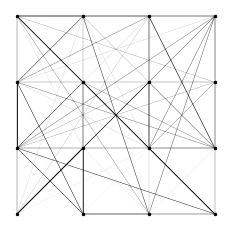

In [290]:
fig, ax = plt.subplots(1,1)
draw_MI(PT_MI, ax, layout="grid")

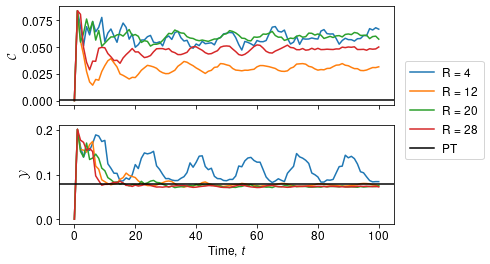

In [291]:
order = 2
fig, axs = plt.subplots(2,1, sharex=True)
for Q in Qs:
    axs[0].plot(Q.C(order))
    axs[0].set_ylabel(r"$\mathcal{C}$")
    
    axs[1].plot(Q.Y(order), label=f"R = {Q.R}")
    axs[1].set_ylabel(r"$\mathcal{Y}$")
    axs[1].set_xlabel(r"Time, $t$")
axs[0].axhline(PT_C, label="PT", c="k")
axs[1].axhline(PT_Y, label="PT", c="k")
axs[1].legend(loc="center", bbox_to_anchor=(1.15, 1.15))

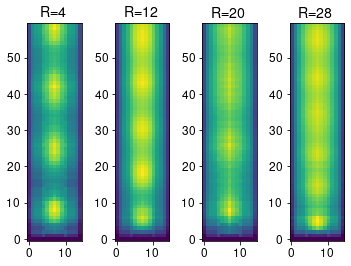

In [292]:
fig, axs = plt.subplots(1,len(Qs))
for i, Q in enumerate(Qs):
    axs[i].imshow(Q.sbipart(2)[:60], origin="lower")
    axs[i].set_title(f"R={Q.R}")

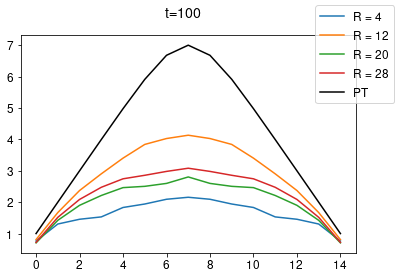

In [293]:
t0=100
fig, ax = plt.subplots(1,1)
for Q in Qs:
    ax.plot(Q.sbipart(2)[t0], label=f"R = {Q.R}")
fig.suptitle(f"t={t0}")

ax.plot(PTpagecurve, c="k", label="PT")
fig.legend()